# I94 Exploratory Data Analysis

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

## Introduction
### Project Description

**Goal/Purpose:** 

This project uses the Metro Interstate Traffic Volume dataset from the University of California Irvine's Machine Learning Repository [[link](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)] to explore ana analyze traffic trends and relationships with various factors affecting traffic. By examining these trends, I aim to uncover insights about how two main variables, time and weather, influence these trends.

The main goal of this project was to identify meaningful patterns and relationships within the dataset, providing insights and suggestions for those in the administration of I94, possibly leading to more hypothetical benefits for the city of Minnesota. A personal goal for me is to work on skills that I will possibly be using in a future data science role. 

It is important to read this notebook because:
1. It offers a structured approach to analyzing a complex dataset, which can be a valuable reference for other studies.
2. These findings may help anticipate traffic congestion for the city of Minnesota and the administration regarding I94. This can help them better the flow of traffic during peak hours.
3. It demonstrates how explanatory data analysis (EDA) can simplify complex datasets with multiple entries and reveal hidden relationships. 
4. Lastly, it is my first thorough data analysis project! I believe that this project showcases multiple skills such as data analysis or familiarity with libraries. 


<p>&nbsp;</p>

**Questions to be Answered:**

- What are key patterns in traffic volume based on the dataset?
- Do time factors such as day of the week, month, hour, or even year impact traffic volume?
- What role do seasonal trends play in affecting traffic volume?
- How can we use these trends to suggest possible solutions or further research?

<p>&nbsp;</p>

**Assumptions/Methodology/Scope:** 

Assumptions:
- The I94 dataset accurately reflects the I94's traffic and includes enough information to draw relationships.
- Traffic patterns are influenced by other factors measured
- Correlations observed are valid and meaningful.

Processing Steps
1. Data Cleaning
2. Feature Engineering
3. Exploratory Data Analysis
4. Insights & Reporting

Scope:
- Analysis of traffic data from specific station on I94
- Excluded: 
  - detailed analysis of factors not measured in dataset
  - Predictive modeling for future traffic




<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a csv file of _8204 data points which contains 8 features. 

<p>&nbsp;</p>

**Description of Attributes:** 

| Column  | Description |
| :------ | :---------- |
| holiday | US National holidays plus regional holiday, Minnesota State Fair |
| temp | Average temp in kelvin |
| rain_1h | Amount in mm of rain that occurred in the hour|
| snow_1h | Amount in mm of snow that occurred in the hour |
| clouds_all | 	Percentage of cloud cover |
| weather_main | Short textual description of the current weather |
| weather_description | Longer textual description of the current weather |
| date_time | Hour of the data collected in local CST time |
| traffic_volume | Hourly I-94 ATR 301 reported westbound traffic volume|

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _(. The original source can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/).

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import skimpy as sp

### Loading Data

In [78]:
# # Load DataFrame
file = "/Users/jacobng/source-code/datasci-projects/i94visualization/Metro_Interstate_Traffic_Volume.csv"
i94 = pd.read_csv(file)

### Basic Data Exploration

In [79]:
# # Show rows and columns count
print(f"Rows count: {i94.shape[0]}\nColumns count: {i94.shape[1]}")

Rows count: 48204
Columns count: 9


In [80]:
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [81]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


#### Check Data Types

In [82]:
# # Show data types
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


- `column1`, `column2`, `column3` are **strings**.
- `column4` and `column5` are **floats**.
- `column6` is an **integer**.

`column3` should be a **datetime** type instead.

#### Check Missing Data

In [83]:
# Print percentage of missing values
missing_percent = i94.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print('None')

---- Percentage of Missing Values (%) -----
holiday    99.873454
dtype: float64


#### Check for Duplicate Rows

In [84]:
# Show number of duplicated rows
print(f"No. of entirely duplicated rows: {i94.duplicated().sum()}")

# Show duplicated rows
i94[i94.duplicated(keep=False)]


No. of entirely duplicated rows: 17


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18696,NaN,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
18697,NaN,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23850,NaN,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
23851,NaN,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26783,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26784,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26979,NaN,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
26980,NaN,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27170,NaN,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
27171,NaN,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642


#### Check Uniqueness of Data

In [85]:
# Print the percentage similarity of values (the lower %, the better)
num_unique = i94.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
holiday                9.090909
weather_main           9.090909
snow_1h                8.333333
weather_description    2.631579
clouds_all             1.666667
rain_1h                0.268817
temp                   0.017114
traffic_volume         0.014916
date_time              0.002465
dtype: float64


#### Check Data Range

In [86]:
# Print summary statistics
i94.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


### Areas to Fix
**Data Types**
- [ ] Issue 1

**Missing Data**
- [ ] 

**Duplicate Rows**
- [ ]

**Uniqueness of Data**
- [ ]

**Data Range**
- [ ]

---

# 3

## Data Preprocessing

Here you can add sections like:

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

Use `assert` where possible to show that preprocessing is done.

### Rename Columns

In [87]:
# Rename columns to snake_case
i94 = sp.clean_columns(i94, replace={})

In [88]:
# Rename columns
columns_to_rename = {"snow_1h":"snow", "rain_1h":"rain"}
i94.rename(columns=columns_to_rename, inplace=True)

In [89]:
# Verify columns are renamed
i94.columns

Index(['holiday', 'temp', 'rain', 'snow', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

### Changing Data Types

In [189]:
# Convert columns to the right data types
i94["temp"] = i94["temp"].astype('float')
i94["rain"] = i94["rain"].astype('float')
i94["snow"] = i94["snow"].astype('float')
i94["clouds_all"] = i94["clouds_all"].astype('float')
i94["weather_description"] = i94["weather_description"].astype('string')
i94["date_time"] = pd.to_datetime(i94["date_time"], infer_datetime_format=True)
i94["traffic_volume"] = i94["traffic_volume"].astype('int')

# Convert to categorical datatype
i94['weather_main'] = pd.Categorical(i94['weather_main'])

/var/folders/w7/rrtkbjkd5wz7hqg95t2p7m780000gn/T/ipykernel_93198/1528526377.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  i94["date_time"] = pd.to_datetime(i94["date_time"], infer_datetime_format=True)


In [190]:
# Verify conversion
i94.dtypes

holiday                        object
temp                          float64
rain                          float64
snow                          float64
clouds_all                    float64
weather_main                 category
weather_description    string[python]
date_time              datetime64[ns]
traffic_volume                  int64
hour                            int32
day_of_week                  category
month                           int32
year                            int32
dtype: object

### Dropping Duplicate Rows

In [92]:
# # Drop entirely duplicated rows
i94.drop_duplicates(inplace=True, ignore_index=True)

In [93]:
# Verify rows dropped
assert i94.duplicated().sum()==0

# 4

# Feature Engineering

Adding hour, day, month, year column for further analysis

In [94]:
i94["hour"] = i94['date_time'].dt.hour

i94["day_of_week"] = i94['date_time'].dt.day_name()

i94["month"] = i94['date_time'].dt.month

i94["year"] = i94['date_time'].dt.year

i94

,holiday,temp,rain,snow,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month,year
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,Tuesday,10,2012
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,Tuesday,10,2012
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,Tuesday,10,2012
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,Tuesday,10,2012
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,Tuesday,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,Sunday,9,2018
48183,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,Sunday,9,2018
48184,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,Sunday,9,2018
48185,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,Sunday,9,2018


## Data Analysis

### Exploring `Traffic Volume`

First, we are going to examine the distribution of the traffic_volume column

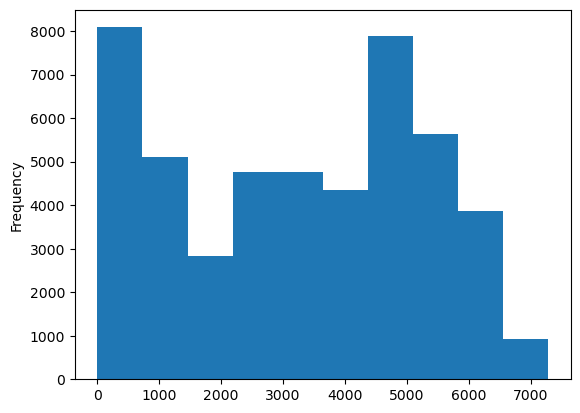

In [95]:
plt.hist(i94["traffic_volume"])
plt.ylabel("Frequency")
plt.show()

In [96]:
i94["traffic_volume"].describe()

count    48187.000000
mean      3259.618134
std       1986.954465
min          0.000000
25%       1192.500000
50%       3379.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

As shown in the graph, the data tends to lead towards a bimodal distribution, with there being approximately 8000 counts of traffic being less than a 1000 and also 8000 counts of traffic being in the 4000 - 5000 range

As shown by the summary of our data, the 25th percentile bout 1192, which means that about 25% of the time, there were only 1193 cars passing the station each hour. 

The 75th percentile shows that about 25% of the time, the traffic volume was about 4933, which is 4x larger.

Because there is a bimodal distribution and varying amounts of data, this observation shows us that we should dive into the direction of comparing daytime and nighttime data

## Traffic Volume: Day vs. Night
In order to achieve this goal of explanining daytime and nighttime data, we'll divide the dataset into two parts:
- Daytime data: hours from 7AM to 7PM
- Nighttime data: hours from 7PM to 7AM 

In [97]:
day = i94.copy()[(i94["hour"] >= 7) & (i94["hour"] < 19)]
night = i94.copy()[(i94["hour"] >= 19) | (i94["hour"] < 7)]

print(day.shape)
print(night.shape)

(23867, 13)
(24320, 13)


## Traffic Volume: Day vs. Night (II)

After separating our dataset into `day` and `night`, we will now plot histograms again to look at the distributions of traffic volume using `plt.subplot`

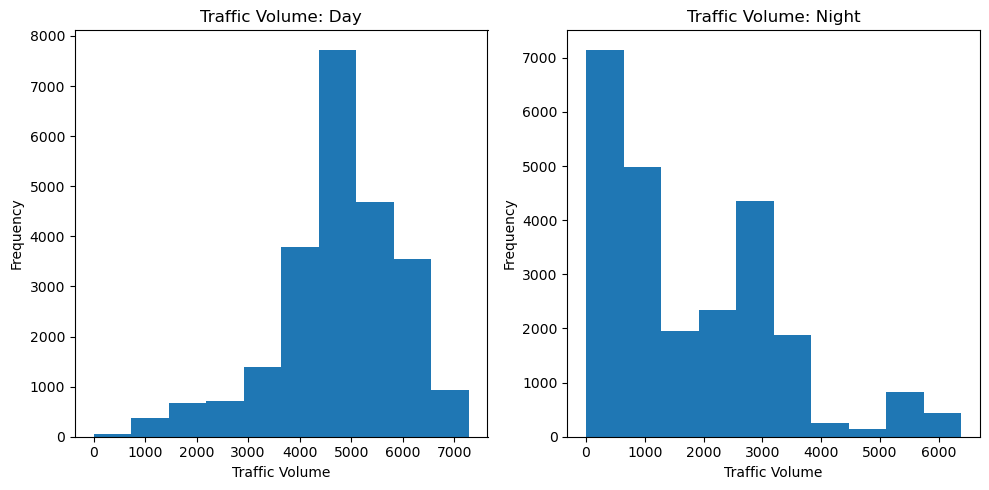

In [98]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume: Day")
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")

plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume: Night")
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")

plt.tight_layout()
plt.show()

In [99]:
day.traffic_volume.describe()

count    23867.000000
mean      4762.033351
std       1174.763788
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [100]:
night.traffic_volume.describe()

count    24320.000000
mean      1785.187870
std       1441.840234
min          0.000000
25%        530.000000
50%       1286.500000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Day histogram is left skewed. Description also shows that about 4820 (about 5000) is the median traffic volume during the day. We can use this value as our value of determination for rush hour or high traffic volume.

Night histogram is right skewed. Description also shows that 1286 is the median traffic volume during the night. Traffic is shown as generally light in comparison to the day histogram.

Because traffic at night is generally night and we want to analyze possible rush hours, we will exclusively look at our data for day hours (7AM - 7PM)

### Brief Overview of Traffic Volume across Time

/var/folders/w7/rrtkbjkd5wz7hqg95t2p7m780000gn/T/ipykernel_93198/3668061485.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_traffic = day.groupby("day_of_week").traffic_volume.mean()


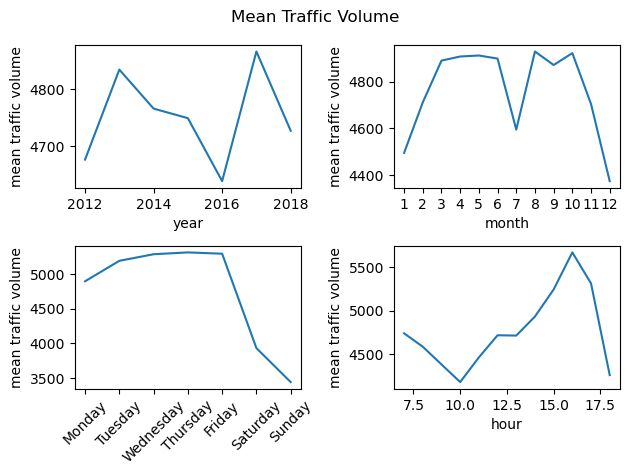

In [126]:
year_traffic = day.groupby("year").traffic_volume.mean()
month_traffic = day.groupby("month").traffic_volume.mean()
hour_traffic = day.groupby("hour").traffic_volume.mean()

day['day_of_week'] = pd.Categorical(day['day_of_week'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
day_traffic = day.groupby("day_of_week").traffic_volume.mean()

plt.subplot(2, 2, 1)
plt.plot(year_traffic.index, year_traffic.values)
plt.xlabel("year")
plt.ylabel("mean traffic volume")


plt.subplot(2,2,2)
plt.xticks(np.arange(0,13,1))
plt.plot(month_traffic.index, month_traffic.values)
plt.xlabel("month")
plt.ylabel("mean traffic volume")

plt.subplot(2,2,3)
plt.plot(day_traffic.index, day_traffic.values)
plt.xticks(rotation=45)
plt.ylabel("mean traffic volume")

plt.subplot(2,2,4)
plt.plot(hour_traffic.index, hour_traffic.values)
plt.xlabel("hour")
plt.ylabel("mean traffic volume")

plt.suptitle("Mean Traffic Volume")
plt.tight_layout() # Adjusts spacing
plt.show()

**Observations**
- Mean Traffic Volume tends to be consistent across each year and month
- During weekends, the mean traffic volume is significanly less during the weekend
- Early morning/late night hours tend to have less trafic

We've already observed how mean traffic volume can vary hour to hour. Let's dive deeper into how mean traffic volume can vary across year, month, and day of the week.

## Time Indicators: Year and Month
Indicators of heavy traffic include time. We already looked into how the hours of day vs night can affect traffic. First, we'll see if there are any observable differences in traffic volume across years

Then we'll look into how traffic volume can be affected by:
- month
- day of the week
- time of day

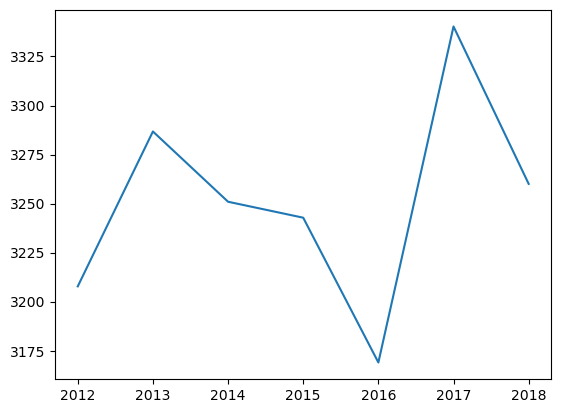

In [102]:
plt.plot(year_traffic)
plt.show()

As shown by the graph, there are two significant lows in 2012 and 2016. As shown by this [article](https://www.mprnews.org/story/2012/06/11/for-road-repairs-closing-highways-vs-limiting-traffic), traffic in 2012 is explained. As shown by this [article](https://www.freep.com/story/news/local/michigan/wayne/2016/06/07/road-construction-on-i94/85554670/), traffic in 2016 is explained.

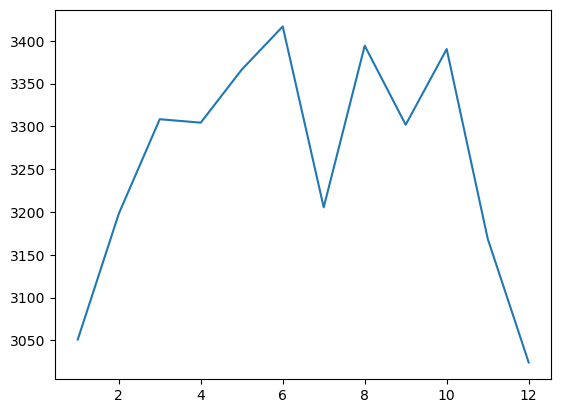

In [103]:
plt.plot(month_traffic)
plt.show()

As seen in the graph, colder months (November - February) tend to have less traffic coming through the station. This tends to follow the trend of less people going out during winter since the snowy weather tends to block roads. 

However, July's mean traffic volume is lower than warmer months (March - October). Let us dive deeper into how that data can possibly be lower.

/var/folders/w7/rrtkbjkd5wz7hqg95t2p7m780000gn/T/ipykernel_93198/543945120.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  july_data = day.copy()[(i94["month"] == 7)]


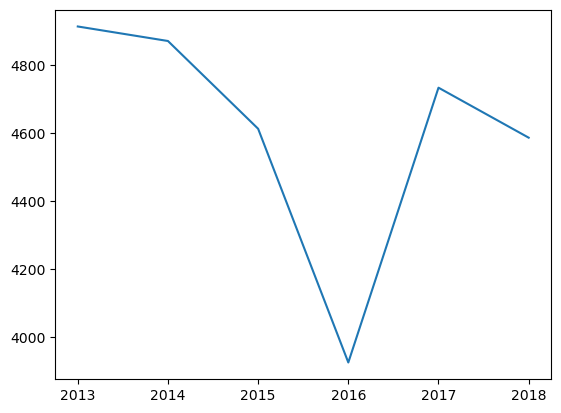

In [127]:
july_data = day.copy()[(i94["month"] == 7)]
july_year_traffic = july_data.groupby("year").traffic_volume.mean()

plt.plot(july_year_traffic.index, july_year_traffic.values)
plt.show()

In [113]:
july_data["traffic_volume"].describe()

count    4795.000000
mean     3205.481752
std      1940.092540
min         0.000000
25%      1212.000000
50%      3268.000000
75%      4829.000000
max      7090.000000
Name: traffic_volume, dtype: float64

As shown by the graph, July 2016 is a unique down month as explained by the previous [article](https://www.freep.com/story/news/local/michigan/wayne/2016/06/07/road-construction-on-i94/85554670/) (construction started mid June). However, other parts of the graph and the median (3268) show that mean traffic volume in July is regularly around other values in the warmer months. 

As a possible conclusion to our hypothesis, warmer months tend to have more traffic than colder months. One can expect warmer months to have a rush hour when mean traffic volume is at least 5,000.

## Time Indicators: Day of the Week

Now, we will dive deeper into another possible time indicator of heavy traffic, the day of the week.

Our preliminary hypothesis is that weekends will have less traffic than weekdays since there are likely less people going to work during the weekend.

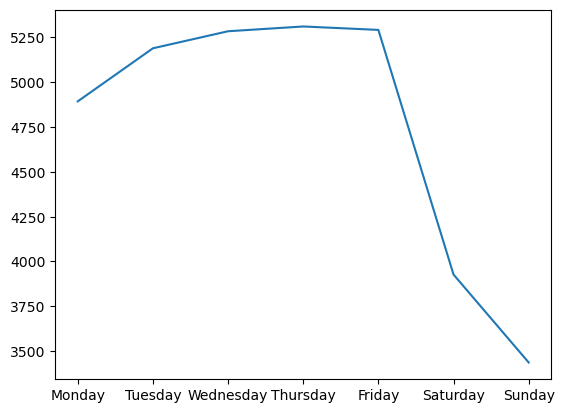

In [128]:
plt.plot(day_traffic)
plt.show()

Our graph looks like it proves our hypothesis. As seen in the graph, Monday - Friday mean traffic volume values tend to be in the 5000s, while Saturday and Sunday tend to see a lower value around the 3500-4000 values.

Now, let's see if hours affect mean traffic volumes.

## Time Indicators: Hours of the Day

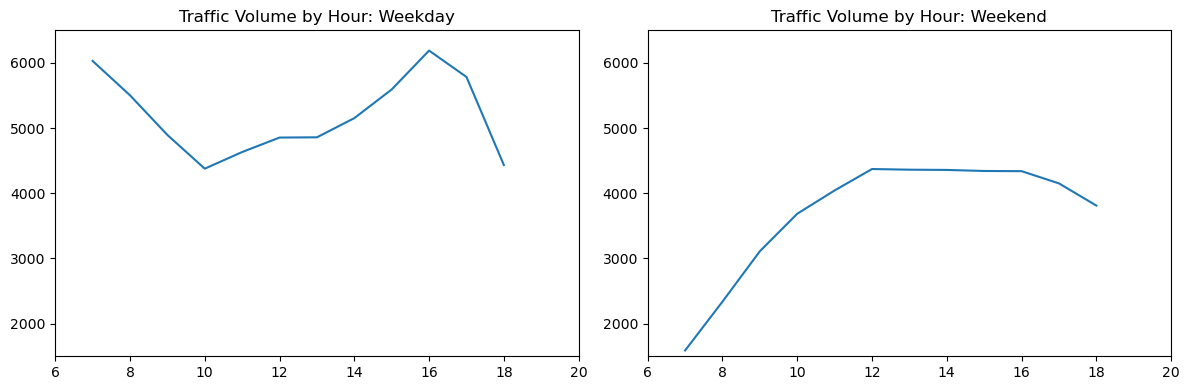

In [183]:
weekday_data = day.copy()[(day["day_of_week"] == "Monday") | (day["day_of_week"] == "Tuesday") | 
                          (day["day_of_week"] == "Wednesday") | (day["day_of_week"] == "Thursday") | 
                          (day["day_of_week"] == "Friday")]
weekend_data = day.copy()[(day["day_of_week"] == "Saturday") | (day["day_of_week"] == "Sunday")]

weekday_hour_traffic = weekday_data.groupby("hour").traffic_volume.mean()
weekend_hour_traffic = weekend_data.groupby("hour").traffic_volume.mean()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(weekday_hour_traffic.index, weekday_hour_traffic.values)
plt.ylim(1500,6500)
plt.xlim(6,20)
plt.title("Traffic Volume by Hour: Weekday")

plt.subplot(1,2,2)
plt.plot(weekend_hour_traffic.index, weekend_hour_traffic.values)
plt.ylim(1500,6500)
plt.xlim(6,20)
plt.title("Traffic Volume by Hour: Weekend")

plt.tight_layout()
plt.show()

At each time during the day, weekday traffic volume values are significantly higher than weekend traffic volume values. Weekday traffic volumes tend to peak during hours 7 and 16 (4pm), which is the time when most people are going to and leaving from respectively. 

To summarize:
- We first separated our dataset into day and night hours in order to analyze typical mean traffic volume values during the day. Traffic is significantly less during the night
- We analyzed mean traffic volume by year, in which we tentatively concluded that 2016 was a down year to major construction.
- We analyzed mean traffic volume by month, where we saw that colder months (Nov - Feb) had less traffic than warmer months
- We analyzed mean traffic volume by day of the week, where we observed that business days had more traffic volume than weekends. 
- We analyzed mean traffic volume by hour in which we saw that rush hours convene around hours 7 and 16, which are typical hours when people go to and leave work

## Weather Indicators

Next up, we will analyze whether there is any possible relationships between weather and traffic

In [192]:
day.corr(numeric_only=True)['traffic_volume']

temp              0.128248
rain              0.003697
snow              0.001266
clouds_all       -0.032969
traffic_volume    1.000000
hour              0.172793
month            -0.022286
year             -0.003561
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation siwth traffic volume with a value of +0.13. All other values do not show a correlation. 

Let us plot a scatter plot between temp and traffic volume to see if there is any relationship.

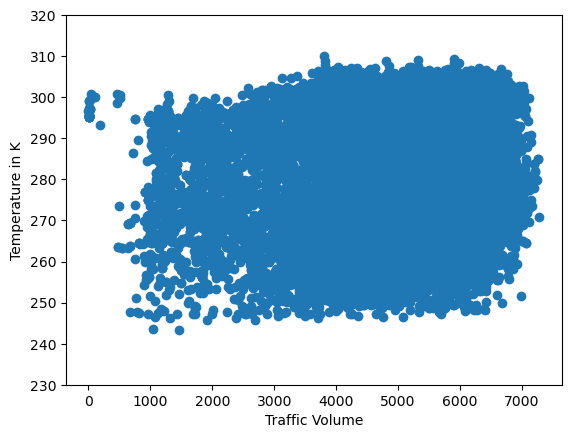

In [201]:
plt.scatter(day["traffic_volume"], day["temp"])
plt.ylim(230, 320) # Two wrong 0K measurements mess up the scatter plot
plt.ylabel("Temperature in K")
plt.xlabel("Traffic Volume")
plt.show()

/var/folders/w7/rrtkbjkd5wz7hqg95t2p7m780000gn/T/ipykernel_93198/1042385746.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_main_data = day.groupby("weather_main").traffic_volume.mean()


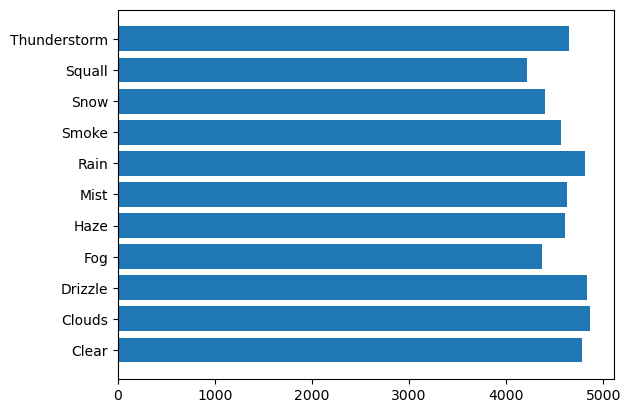

In [202]:
weather_main_data = day.groupby("weather_main").traffic_volume.mean()

plt.barh(weather_main_data.index, weather_main_data.values)
plt.show()

We see that there are no values above 5000 for our general weather categories.

 Let us dive deeper into our the dataset's more specific weather descriptions to see if we can find anything.

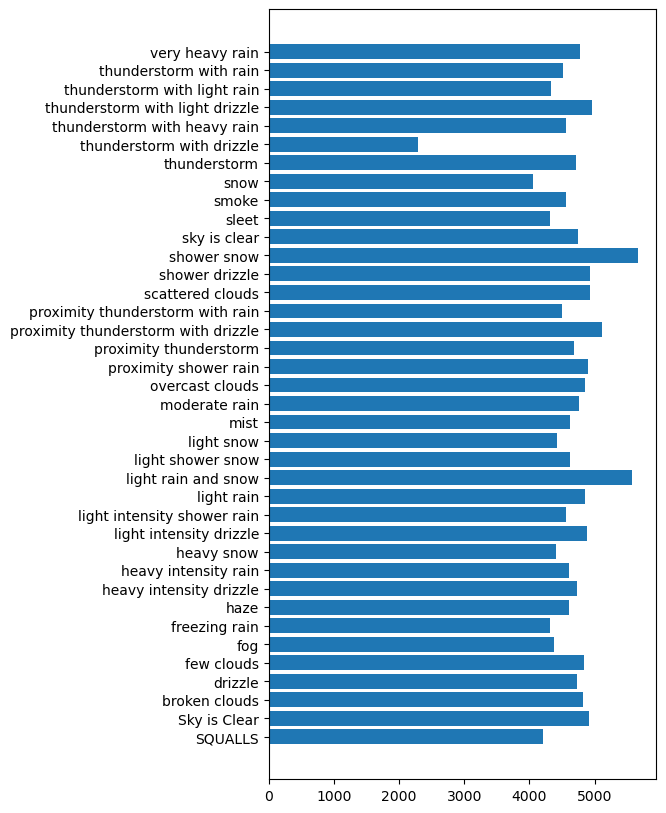

In [210]:
weather_description_data = day.groupby("weather_description").traffic_volume.mean()

plt.figure(figsize=(5, 10))
plt.barh(weather_description_data.index, weather_description_data.values)
plt.show()

As shown by our graph, there our three values above 5000:
- light rain and snow
- shower snow
- proximity thunderstorm with drizzle

This is not necessarily bad weather, but it makes sense that people would not be using cars during giant rainstorms or snowstorms. Bad weather might make people want to use their cars more instead of walking or waiting in the rain for public transportation.

---

# 5

## Conclusion 
### Time Indicators
We were able to find multiple indicators of traffic based off time
- Day and Night: More traffic during the day, less traffic during the night
- Year: 2016 was a down year for traffic in our dataset ranging from 2012 to 2018. This might be due to significant construction projects
- Month: More traffic during warmer months, less traffic during colder months
- Day of Week: More traffic during weekdays, less traffic during weekends
- Hour: Business day traffic tends to be more during 7AM and 4PM, which are two times that people tend to go to and leave from work respectively

### Weather Indicators
Three weather statuses had higher traffic volume values than others:
- light rain and snow
- shower snow
- proximity thunderstorm with drizzle

---

# 6

## Epilogue

### References

Hogue, J. (2019). Metro Interstate Traffic Volume [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5X60B.

### Versioning
Notebook and insights by Jacob Ng.
- Version: 1.0
- Date: 2024-12-25 *Merry Christmas!*


### Notes by Jacob for Jacob
```
Notes on Time Series:
Pandas syntax
- .dt.year: Extracts the year (e.g., 2024).
- .dt.month: Extracts the month (e.g., 12).
- .dt.day: Extracts the day of the month (e.g., 23).
- .dt.hour: Extracts the hour (e.g., 8).
- .dt.minute: Extracts the minute (e.g., 15).
- .dt.second: Extracts the second (e.g., 0).
- .dt.dayofweek: Returns the day of the week (e.g., 0 for Monday, 6 for Sunday).
- .dt.date: Extracts only the date part (without time).
- .dt.time: Extracts only the time part.
```

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b689e16b-e36c-4f8c-b17a-b3e876352669' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>